<a href="https://colab.research.google.com/github/leeesoraaa/TIL/blob/main/data%20analysis/colab/03_Titanic_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 라이브러리 로딩

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로딩

In [ ]:
titanic = pd.read_csv('titanic.csv')

# 데이터 기본 탐색

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

- 'PassengerId': 승객의 고유번호
- 'Survived': 생존여부(0=사망, 1=생존)
- 'Pclass': 객실 등급(1 ~ 3 등급)
- 'Name': 이름
- 'Sex': 성별(male, female)
- 'Age': 나이
- 'SibSp': 동반 가족 수(형제자매, 배우자)
- 'Parch': 동반 가족 수(부모, 자식)
- 'Ticket': 티켓 고유 번호
- 'Fare': 티켓 요금
- 'Cabin': 객실 번호
- 'Embarked': 승선한 항구(C, Q, S)

In [ ]:
titanic = titanic.drop(['WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'], axis=1)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.to_csv('raw_titanic.csv')

In [ ]:
titanic = titanic.astype({'Survived':'int32'})

In [ ]:
# 수치데이터의 기술통계량
## object 옵션을 통해 문자열의 빈도수도 추출할 수 있다.
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 훈련 데이터 샘플 수: 891(count = 891)
- 훈련 데이터 내 생존율: 38.4%(Survived의 mean = 0.3838)

In [ ]:
# 문자데이터(범주형 데이터)의 통계량
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- 훈련데이터의 성별은 남자가 577명으로 더 많다.(Sex의 top = male, freq = 577
- 훈련데이터의 가장 많이 승선한 항구: S, 644명(Embarked의 top = S, freq = 644

In [ ]:
# 객실 등급(Pclass)에 따른 생존율 비교
## Pclass, Survived
titanic.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

- 1등실의 생존율: 63.0%
- 2등실의 생존율: 47.3%
- 3등실의 생존율: 24.2%
- 객실 등급이 높을 수록 생존율이 높다.

In [ ]:
# 선생님 답안
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
## groupby에 as_index = False: 그룹기준(Pclass)을 index로 사용하지 않는다라는 의미
## ascending: 오름차순

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
# 성별에 따른 생존율 비교
## Sex, Survived
titanic.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

- 여성의 생존율: 74.2%
- 남성의 생존율: 18.9%
- 여성의 생존율이 더 높다.

In [ ]:
# 함께 승선한 형제 자매와 배우자 수에 따른 생존율 비교
## SibSp, Survived
titanic.groupby('SibSp').Survived.mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

- SibSp 0명의 생존율: 34.5%
- SibSp 1명의 생존율: 53.6%
- SibSp 2명의 생존율: 46.4%
- SibSp 3명의 생존율: 25.0%
- SibSp 4명의 생존율: 16.7%
- SibSp 5명과 8명인 사람은 생존하지 못했다.

In [ ]:
# 함께 승선한 부모와 자녀 수에 따른 생존율 비교
## Parch, Survived
titanic.groupby('Parch').Survived.mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

- Parch 0명의 생존율: 34.4%
- Parch 1명의 생존율: 55.1%
- Parch 2명의 생존율: 50.0%
- Parch 3명의 생존율: 60.0%
- Parch 4명의 생존율: 0.0%
- Parch 5명의 생존율: 20.0%
- Parch 6명의 생존율: 0.0%

In [ ]:
# 연령대에 따른 생존율 비교
## Age, Survived
if (titanic['Age'] >= 0) & (titanic['Age'] < 10):
  titanic['Ages'] = 0
elif (titanic['Age'] >= 10) & (titanic['Age'] < 20):
  titanic['Ages'] = 10
elif (titanic['Age'] >= 20) & (titanic['Age'] < 30):
  titanic['Ages'] = 20
elif (titanic['Age'] >= 30) & (titanic['Age'] < 40):
  titanic['Ages'] = 30
elif (titanic['Age'] >= 40) & (titanic['Age'] < 50):
  titanic['Ages'] = 40
elif (titanic['Age'] >= 50) & (titanic['Age'] < 60):
  titanic['Ages'] = 50
elif (titanic['Age'] >= 60) & (titanic['Age'] < 70):
  titanic['Ages'] = 60
elif (titanic['Age'] >= 70) & (titanic['Age'] < 80):
  titanic['Ages'] = 70
elif (titanic['Age'] >= 80) & (titanic['Age'] < 90):
  titanic['Ages'] = 80
else:
  titanic['Ages'] = 90

ValueError: ignored

False

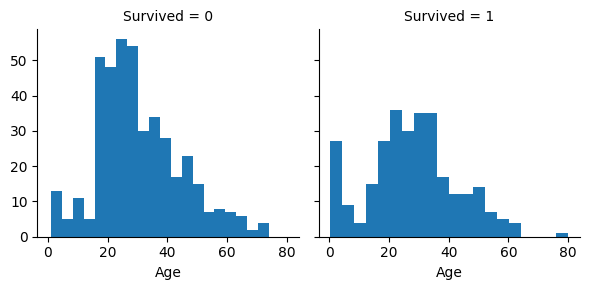

In [ ]:
# 생존여부에 따른 연령(Age)의 분포 - 시각화(histogram)
import seaborn as sns
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(titanic, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램의 bin을 20으로 설정
g.map(plt.hist, 'Age', bins=20)
plt.show()

- 4세 이하의 아이의 생존율이 높다

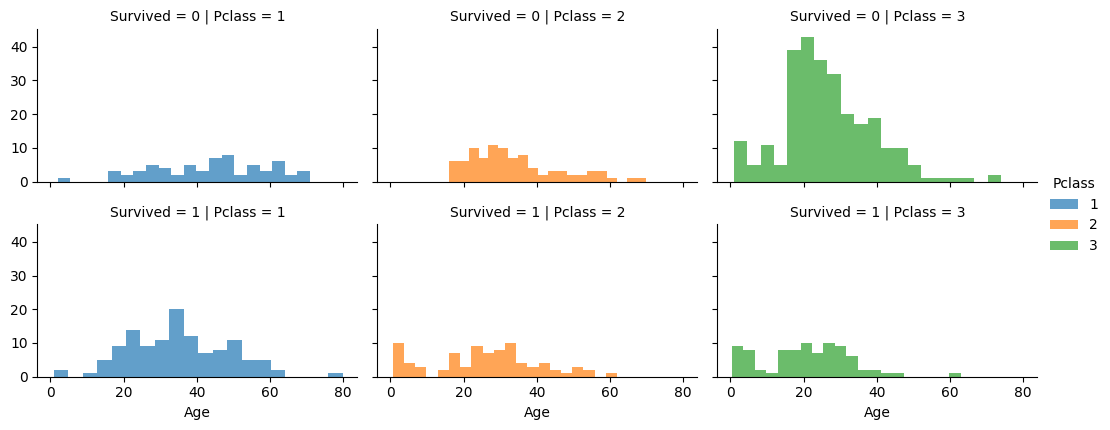

In [ ]:
# 객실 등급(Pclass)과 생존 여부(Survived)에 따른 연령(Age)분포
g = sns.FacetGrid(titanic, col = 'Pclass', row = 'Survived', hue = 'Pclass', height=2.2, aspect=1.6)
g.map(plt.hist, 'Age', bins = 20, alpha=0.7)
g.add_legend()
plt.show()

- 3등급의 승객 수가 가장 많지만 생존율은 가장 낮다.
- 객실 등급이 높을수록 생존율이 높다.
- 2등급의 승객 중 유아는 대부분 생존했다.

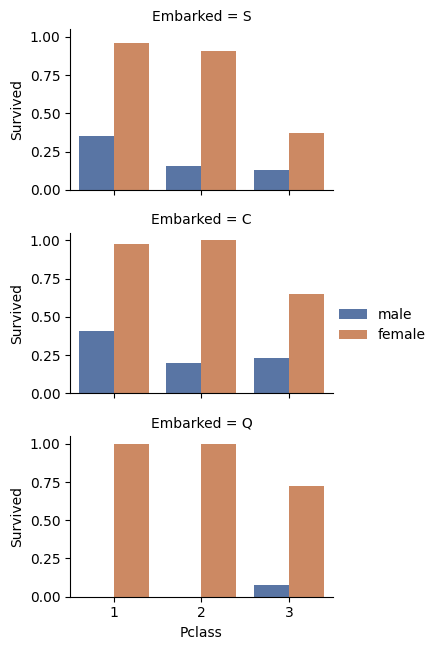

In [ ]:
# 승선항(Embarked)에 따른 생존율(Survived)의 시각화
g = sns.FacetGrid(titanic, row = 'Embarked', height = 2.2, aspect=1.6)
# sns.pointplot(data, x, y, hue)
# palette 옵션: 전체를 하나의 색깔로 지정하는 것이 아니라 각기 다른 색으로 설정하기 위한 옵션
# order는 x축 순서
# hue_order: 색깔순서[남성, 여성]
g.map(sns.barplot, 'Pclass', 'Survived', 'Sex', palette='deep', order=[1,2,3], hue_order=['male', 'female'], errorbar=None)
g.add_legend()

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [ ]:
# 성별(Sex) 변수를 숫자형으로 변경하는 작업
titanic['Sex'] = titanic['Sex'].map({'female':1, 'male':0}).astype(int)